Clasificación básica: Clasificación de imágenes de ropa --- 51:05 min
===

* Última modificación: Marzo 7, 2022 | YouTube

Adaptado de en: 

* https://www.tensorflow.org/tutorials/quickstart/beginner

* https://www.tensorflow.org/tutorials/keras/classification

![assets/fashion-mnist-sprite.png](assets/fashion-mnist-sprite.png)

Importación de librerías
---

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf

tf.__version__

'2.8.0'

Importación de los datos
---

In [2]:
#
#  Descarga de los datos
#
(
    (train_images, train_labels),
    (test_images, test_labels),
) = tf.keras.datasets.fashion_mnist.load_data()

#
#  Nombres de las clases
#
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

print("Valor\tNombre")
print("-" * 40)
for i, name in enumerate(class_names):
    print(i, "\t", name, sep="")

Valor	Nombre
----------------------------------------
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


In [3]:
#
#  Cantidad de patrones de entrenamiento y prueba
#
train_images.shape, len(train_labels), test_images.shape, len(test_labels)

((60000, 28, 28), 60000, (10000, 28, 28), 10000)

Preprocesamiento de datos
---

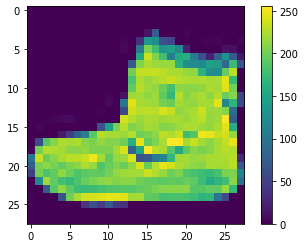

In [4]:
import matplotlib.pyplot as plt

#
# Los pixels son enteros en el rango 0-255
#
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
#
# Escalamiento de los datos
#
train_images = train_images / 255.0
test_images = test_images / 255.0

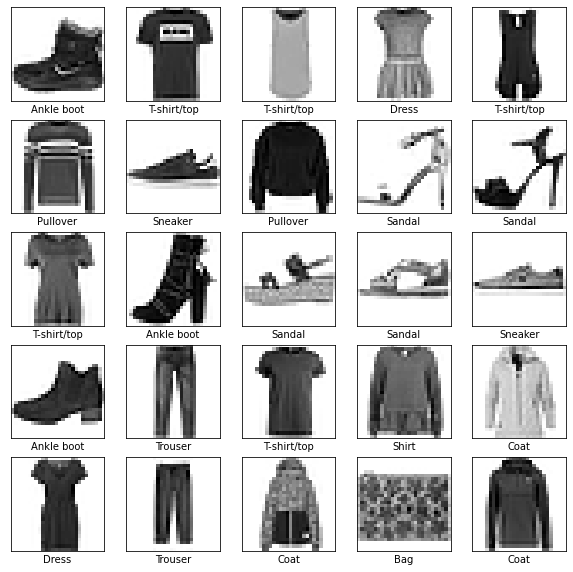

In [6]:
#
# Chequeo
#
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Construcción del modelo
--

In [7]:
#
# Configuración de las capas
#
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)

In [8]:
#
# Compilación del modelo. En esta función se especifica:
#
# - El optimizador.
# - La función de pérdida.
# - Las metricas a monitorear.
#
model.compile(
    #
    # Especifica el algoritmo usado:
    #
    #   * 'adadelta' : tf.keras.optimizers.Adadelta
    #   * 'adagrad' : tf.keras.optimizers.Adagrad
    #   * 'adam' : tf.keras.optimizers.Adam
    #   * 'adamax' : tf.keras.optimizers.Adamax
    #   * 'ftrl' : tf.keras.optimizers.Ftrl
    #   * 'nadam' : tf.keras.optimizers.Nadam
    #   * 'rmsprop' : tf.keras.optimizers.RMSprop
    #   * 'sgd' : tf.keras.optimizers.SGD
    #
    # Puede usarse:
    #
    #   optimizer='adam'
    #
    optimizer=tf.keras.optimizers.Adam(),
    #
    # Función de costo
    #
    #   * tf.keras.losses.BinaryCrossentropy
    #   * tf.keras.losses.CategoricalCrossentropy
    #   * tf.keras.losses.CategoricalHinge
    #   * tf.keras.losses.CosineSimilarity
    #   * tf.keras.losses.Hinge
    #   * tf.keras.losses.Huber
    #   * tf.keras.losses.KLDivergence
    #   * tf.keras.losses.LogCosh
    #   * tf.keras.losses.MeanAbsoluteError
    #   * tf.keras.losses.MeanAbsolutePercentageError
    #   * tf.keras.losses.MeanSquaredError
    #   * tf.keras.losses.MeanSquaredLogarithmicError
    #   * tf.keras.losses.Poisson
    #   * tf.keras.losses.SparseCategoricalCrossentropy
    #   * tf.keras.losses.SquaredHinge
    #
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #
    # Define las metricas a monitorear
    #
    #   * 'accuracy' : tf.keras.metrics.Accuracy
    #   * 'binary_accuracy' : tf.keras.metrics.BinaryAccuracy
    #   * 'binary_crossentropy' : tf.keras.metrics.BinaryCrossentropy
    #   * 'categorical_accuracy' : tf.keras.metrics.CategoricalAccuracy
    #   * 'categorical_crossentropy' : tf.keras.metrics.CategoricalCrossentropy
    #   * 'categorical_hinge' : tf.keras.metrics.CategoricalHinge
    #   * 'cosine_similarity' : tf.keras.metrics.CosineSimilarity
    #   * 'hinge' : tf.keras.metrics.Hinge
    #   * 'kullback_leibler_divergence' : tf.keras.metrics.KLDivergence
    #   * 'logcosh' : tf.keras.metrics.LogCoshError
    #   * 'mean' : tf.keras.metrics.Mean
    #   * 'mean_absolute_error': tf.keras.metrics.MeanAbsoluteError
    #   * 'mean_absolute_percentage_error' : tf.keras.metrics.MeanAbsolutePercentageError
    #   * 'mean_squared_error' : tf.keras.metrics.MeanSquaredError
    #   * 'mean_squared_logarithmic_error' : tf.keras.metrics.MeanSquaredLogarithmicError
    #   * 'root_mean_squared_error': tf.keras.metrics.RootMeanSquaredError
    #   * 'squared_hinge' : tf.keras.metrics.SquaredHinge
    #   ...
    #
    metrics=["accuracy"],
)

En esta lección se usará la función de entropía cruzada. Esta es una medida del desempeño del clasificador que entrega probabilidad como salida. Esta medida incrementa cuando la probabilidad pronosticada diverge de la clase actual. En clasificación binaria $y \in \{0,1\}$, la entropía se calcula como:

$$
- y \cdot \log(p) - (1 - y) \log (1-p)
$$

donde $p$ es la probabilidad de que el pronóstico sea igual a $y$

Si $y=1$, la función es $-\log(p)$; si $y=0$, la función es $-\log (1-p))$. La forma de curva de pérdida para cada caso es: 

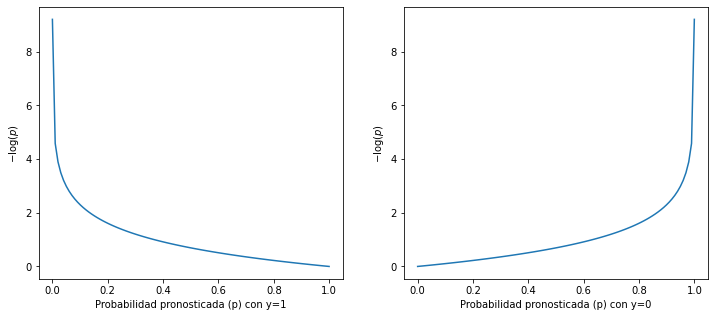

In [9]:
import numpy as np


def plot_entropy():

    x = np.linspace(0.0001, 0.9999, 100)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, -np.log(x))
    plt.xlabel("Probabilidad pronosticada (p) con y=1")
    plt.ylabel("$-\log(p)$")

    plt.subplot(1, 2, 2)
    plt.plot(x, -np.log(1 - x))
    plt.xlabel("Probabilidad pronosticada (p) con y=0")
    plt.ylabel("$-\log(p)$")

    plt.show()


plot_entropy()

Para más de dos clases se generaliza a:

$$
- \sum d_c \cdot \log (p_c)
$$

donde $d_c$ indica que el punto pertenece a la clase $c$ y $p_c$ es su probabilidad de pertenencia (resultado del clasificador)

Entrenamiento del modelo
---

In [10]:
#
# Entrenamiento
#
model.fit(
    train_images,
    train_labels,
    epochs=10,
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3718 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3116 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2550 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [11]:
#
# Evaluación de la precisión
#
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3508 - accuracy: 0.8800 - 540ms/epoch - 2ms/step

Test accuracy: 0.8799999952316284


In [12]:
#
# Pronóstico
#
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict(test_images)

In [14]:
#
# Pronóstico para el primer ejemplo
#
predictions[0]

array([1.2566730e-07, 3.2395329e-07, 1.4862120e-07, 6.4923293e-09,
       5.5462795e-10, 5.2745570e-04, 1.0032743e-07, 1.6058464e-02,
       2.8505036e-07, 9.8341310e-01], dtype=float32)

In [15]:
#
# Selección de la clase
#
np.argmax(predictions[0])

9

In [16]:
#
# Resultado esperado
#
test_labels[0]

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

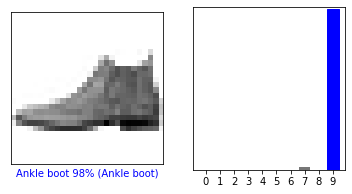

In [18]:
#
# Verificación de la predicción para la imágen 0 del
# conjunto de prueba
#
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

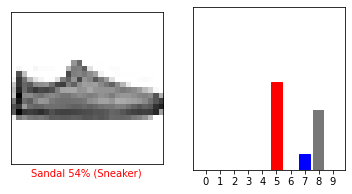

In [19]:
#
# Verificación de la predicción para la imágen 12 del
# conjunto de prueba
#
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

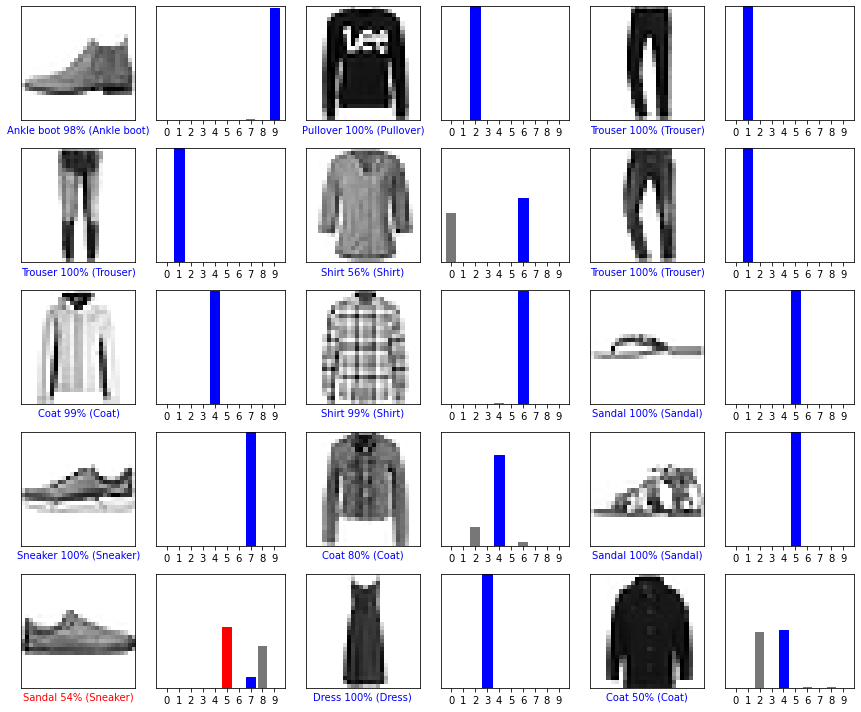

In [20]:
#
# Primeras 15 imágenes del conjunto de prueba
#
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Uso del modelo entrenado
---

In [21]:
#
# Dimensiones de una imágen
#
img = test_images[1]

img.shape

(28, 28)

In [22]:
#
# Creación de un lote de una sola imagen
#
img = np.expand_dims(img, 0)

img.shape

(1, 28, 28)

In [23]:
#
# Pronóstico
#
predictions_single = probability_model.predict(img)

predictions_single

array([[2.1545216e-04, 9.8107326e-17, 9.9948919e-01, 4.3915212e-11,
        5.6289344e-05, 1.9963798e-12, 2.3900178e-04, 1.5670631e-16,
        7.4124769e-11, 5.3153336e-18]], dtype=float32)

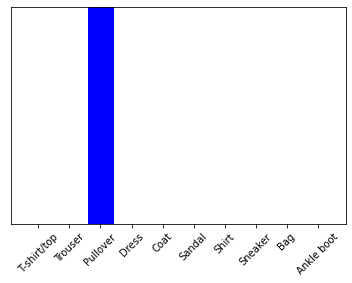

In [24]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()